<a href="https://colab.research.google.com/github/Sananda-Dutta/CODSOFT/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Dataset Overview ===
Rows: 891, Columns: 12

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


/tmp/ipython-input-1-3956160428.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-1-3956160428.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

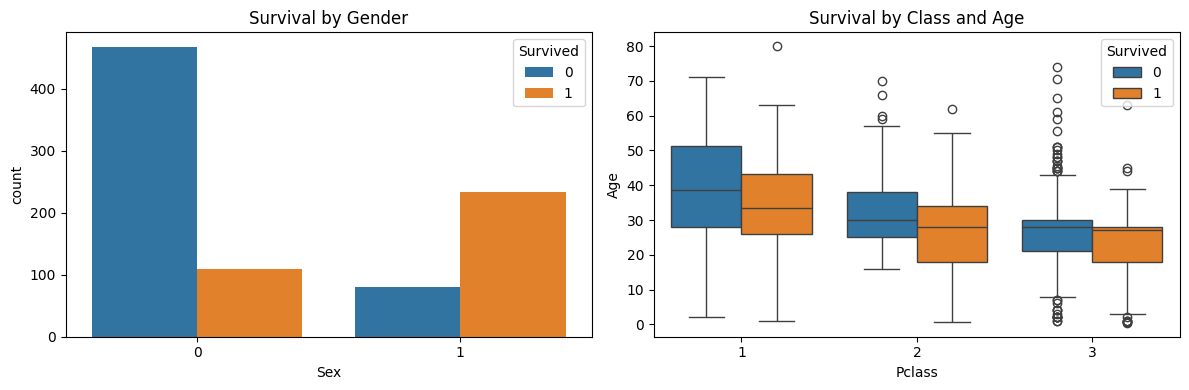


=== Model Performance ===
Accuracy: 82.68%

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



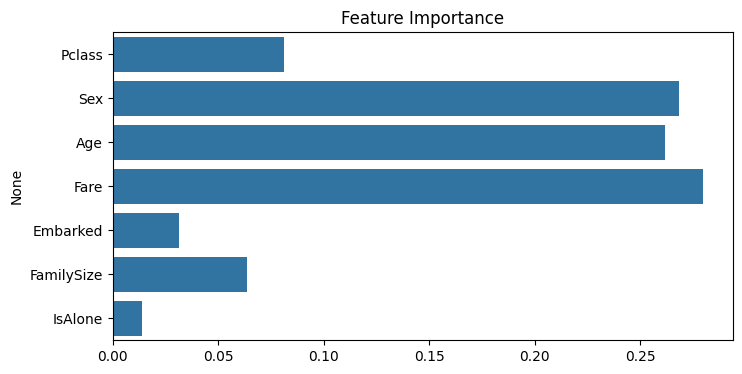

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/Sananda-Dutta/CODSOFT/main/Titanic.csv"
df = pd.read_csv(url)

print("=== Dataset Overview ===")
print(f"Rows: {len(df)}, Columns: {len(df.columns)}")
print("\nMissing Values:")
print(df.isnull().sum())

def preprocess_data(df):
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = np.where(df['FamilySize'] > 1, 0, 1)

    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

    features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'IsAlone']
    X = df[features]
    y = df['Survived']

    return X, y

X, y = preprocess_data(df)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')

plt.subplot(1, 2, 2)
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=df)
plt.title('Survival by Class and Age')
plt.tight_layout()
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("\n=== Model Performance ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 4))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title('Feature Importance')
plt.show()